<a href="https://colab.research.google.com/github/ChanyutJean/2143488-Big-Data-AI-HW/blob/main/Lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Data

In [107]:
# Don't forget to import data!
import pandas as pd
df = pd.read_csv("HW3_movie_metadata.csv")

In [108]:
print(df.head())
print(df.tail())
print(df.info())
print(df.describe())
print(df.isna())

       director_name  ...  movie_facebook_likes
0      James Cameron  ...                 33000
1     Gore Verbinski  ...                     0
2         Sam Mendes  ...                 85000
3  Christopher Nolan  ...                164000
4        Doug Walker  ...                     0

[5 rows x 27 columns]
         director_name  ...  movie_facebook_likes
5038       Scott Smith  ...                    84
5039               NaN  ...                 32000
5040  Benjamin Roberds  ...                    16
5041       Daniel Hsia  ...                   660
5042          Jon Gunn  ...                   456

[5 rows x 27 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_name              4939 non-null   object 
 1   num_critic_for_reviews     4993 non-null   float64
 2   duration                   502

In [109]:
df['imdb_score'].describe()

count    5043.000000
mean        6.442138
std         1.125116
min         1.600000
25%         5.800000
50%         6.600000
75%         7.200000
max         9.500000
Name: imdb_score, dtype: float64

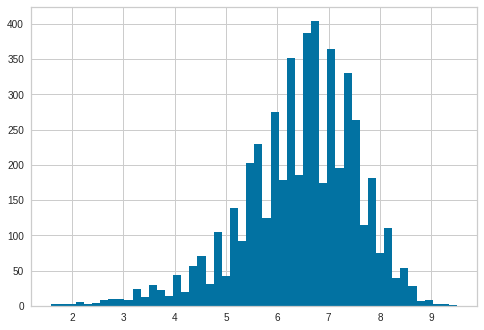

In [110]:
df['imdb_score'].hist(bins=50)

# Preprocessing Data

In [111]:
df2 = df.copy()
df2 = df2.dropna(subset = ['imdb_score'])
df2 = df2._get_numeric_data()
df2 = df2.fillna(df2.median())
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5043 entries, 0 to 5042
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   num_critic_for_reviews     5043 non-null   float64
 1   duration                   5043 non-null   float64
 2   director_facebook_likes    5043 non-null   float64
 3   actor_3_facebook_likes     5043 non-null   float64
 4   actor_1_facebook_likes     5043 non-null   float64
 5   gross                      5043 non-null   float64
 6   num_voted_users            5043 non-null   int64  
 7   cast_total_facebook_likes  5043 non-null   int64  
 8   facenumber_in_poster       5043 non-null   float64
 9   num_user_for_reviews       5043 non-null   float64
 10  budget                     5043 non-null   float64
 11  title_year                 5043 non-null   float64
 12  actor_2_facebook_likes     5043 non-null   float64
 13  imdb_score                 5043 non-null   float

In [112]:
lo_bound = df2['imdb_score'].quantile(0.4)
hi_bound = df2['imdb_score'].quantile(0.6)

lo_data = df2[df2['imdb_score'] <= lo_bound]
lo_data['imdb_score'].loc[:] = 0 #LOW

hi_data = df2[df2['imdb_score'] >= hi_bound]
hi_data['imdb_score'].loc[:] = 1 #HIGH

df3 = pd.concat([lo_data, hi_data], axis=0)
df3['imdb_score'].value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


1.0    2133
0.0    2115
Name: imdb_score, dtype: int64

In [113]:
X = df3.drop(columns='imdb_score')
y = df3[['imdb_score']]
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4248 entries, 6 to 5039
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   num_critic_for_reviews     4248 non-null   float64
 1   duration                   4248 non-null   float64
 2   director_facebook_likes    4248 non-null   float64
 3   actor_3_facebook_likes     4248 non-null   float64
 4   actor_1_facebook_likes     4248 non-null   float64
 5   gross                      4248 non-null   float64
 6   num_voted_users            4248 non-null   int64  
 7   cast_total_facebook_likes  4248 non-null   int64  
 8   facenumber_in_poster       4248 non-null   float64
 9   num_user_for_reviews       4248 non-null   float64
 10  budget                     4248 non-null   float64
 11  title_year                 4248 non-null   float64
 12  actor_2_facebook_likes     4248 non-null   float64
 13  aspect_ratio               4248 non-null   float

In [114]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,shuffle=True,stratify=y,random_state=100)

### The previous code has been synonymous with the Logistic Regression model so far. From now on, that will be different. We will not delete colinear features, and will not scale features also.

# Modeling Data

In [115]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='entropy',max_depth=4)
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
DT.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

Classification Report: 
               precision    recall  f1-score   support

         LOW       0.69      0.84      0.76       635
        HIGH       0.80      0.63      0.71       640

    accuracy                           0.74      1275
   macro avg       0.75      0.74      0.73      1275
weighted avg       0.75      0.74      0.73      1275
 

Accuracy on train:   0.743 

Accuracy on test:  0.737 



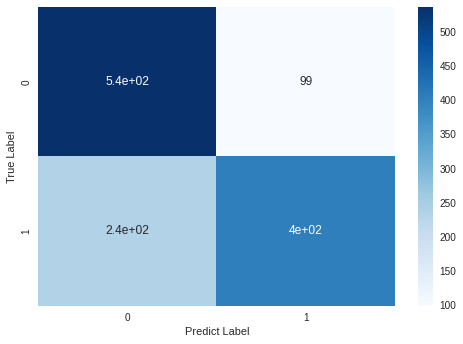

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
print("Classification Report: \n", metrics.classification_report(y_test,y_pred,target_names=('LOW', 'HIGH')),'\n')
print("Accuracy on train:  ",DT.score(X_train,y_train).round(3),'\n')
print("Accuracy on test: ",DT.score(X_test,y_test).round(3),'\n')
cf=metrics.confusion_matrix(y_test,y_pred).round(3)
sns.heatmap(cf,annot=True,cmap='Blues')
plt.ylabel("True Label")
plt.xlabel("Predict Label")
plt.show()

|--- num_voted_users <= 141419.50
|   |--- duration <= 110.50
|   |   |--- budget <= 20500000.00
|   |   |   |--- num_voted_users <= 31400.00
|   |   |   |   |--- class: 0.0
|   |   |   |--- num_voted_users >  31400.00
|   |   |   |   |--- class: 1.0
|   |   |--- budget >  20500000.00
|   |   |   |--- movie_facebook_likes <= 4000.00
|   |   |   |   |--- class: 0.0
|   |   |   |--- movie_facebook_likes >  4000.00
|   |   |   |   |--- class: 0.0
|   |--- duration >  110.50
|   |   |--- budget <= 36500000.00
|   |   |   |--- num_voted_users <= 8387.50
|   |   |   |   |--- class: 0.0
|   |   |   |--- num_voted_users >  8387.50
|   |   |   |   |--- class: 1.0
|   |   |--- budget >  36500000.00
|   |   |   |--- num_voted_users <= 90838.00
|   |   |   |   |--- class: 0.0
|   |   |   |--- num_voted_users >  90838.00
|   |   |   |   |--- class: 1.0
|--- num_voted_users >  141419.50
|   |--- budget <= 44750000.00
|   |   |--- title_year <= 2004.50
|   |   |   |--- class: 1.0
|   |   |--- title_y

[Text(0.5089285714285714, 0.9, 'num_voted_users <= 141419.5\nentropy = 1.0\nsamples = 2973\nvalue = [1480, 1493]\nclass = HIGH'),
 Text(0.2857142857142857, 0.7, 'duration <= 110.5\nentropy = 0.982\nsamples = 2447\nvalue = [1418, 1029]\nclass = LOW'),
 Text(0.14285714285714285, 0.5, 'budget <= 20500000.0\nentropy = 0.926\nsamples = 1755\nvalue = [1156, 599]\nclass = LOW'),
 Text(0.07142857142857142, 0.3, 'num_voted_users <= 31400.0\nentropy = 0.979\nsamples = 1246\nvalue = [728, 518]\nclass = LOW'),
 Text(0.03571428571428571, 0.1, 'entropy = 0.925\nsamples = 927\nvalue = [612, 315]\nclass = LOW'),
 Text(0.10714285714285714, 0.1, 'entropy = 0.946\nsamples = 319\nvalue = [116, 203]\nclass = HIGH'),
 Text(0.21428571428571427, 0.3, 'movie_facebook_likes <= 4000.0\nentropy = 0.632\nsamples = 509\nvalue = [428, 81]\nclass = LOW'),
 Text(0.17857142857142858, 0.1, 'entropy = 0.523\nsamples = 424\nvalue = [374, 50]\nclass = LOW'),
 Text(0.25, 0.1, 'entropy = 0.947\nsamples = 85\nvalue = [54, 31]

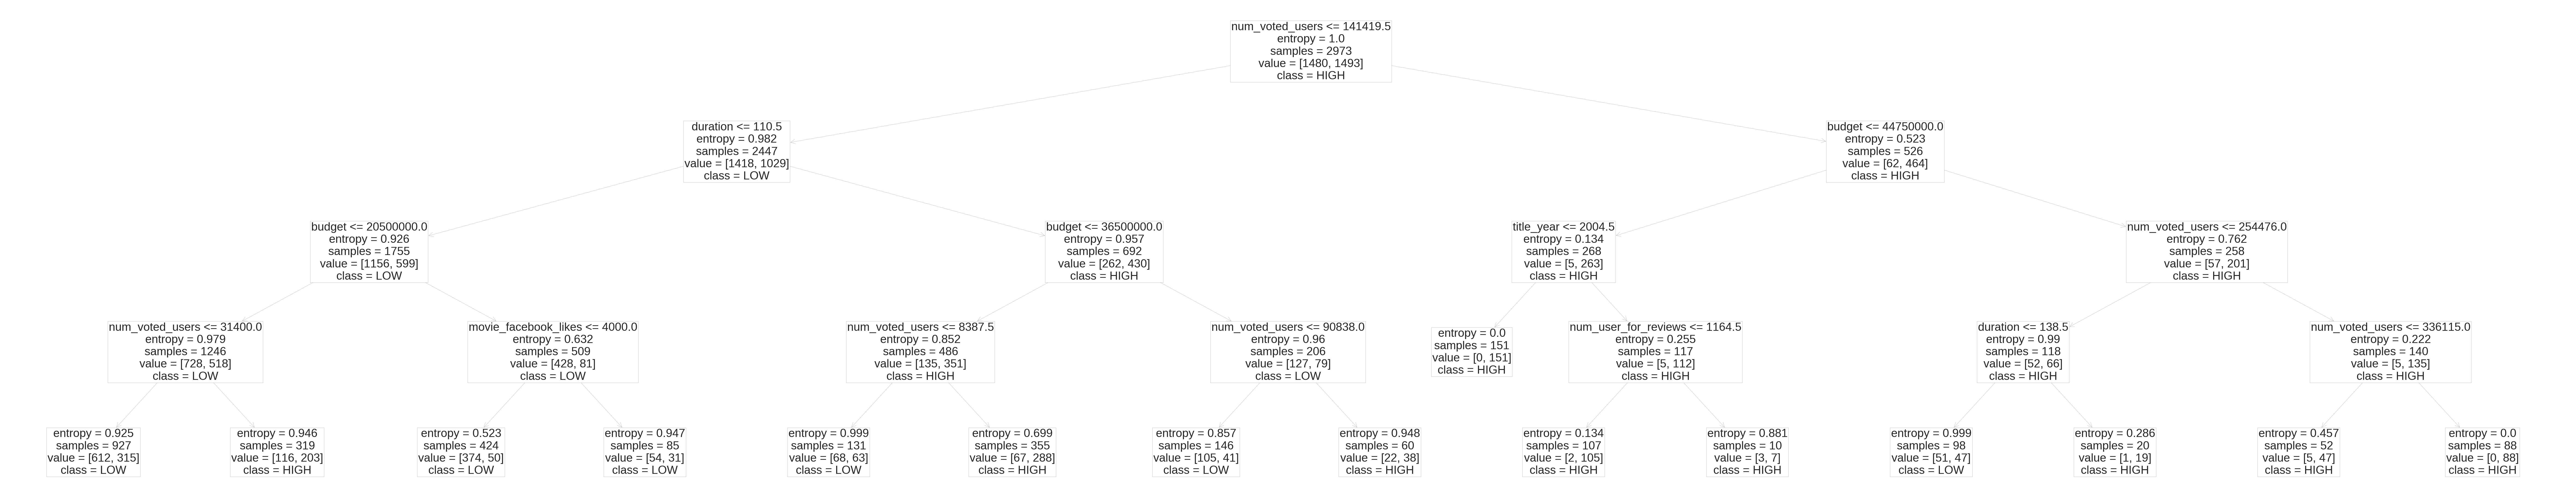

In [117]:
from sklearn.tree import export_text, plot_tree
print(export_text(DT, feature_names=X_train.columns.tolist()))
plt.figure(figsize=(200,40))
plot_tree(DT,feature_names=X_train.columns,class_names=('LOW', 'HIGH'), fontsize=50)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


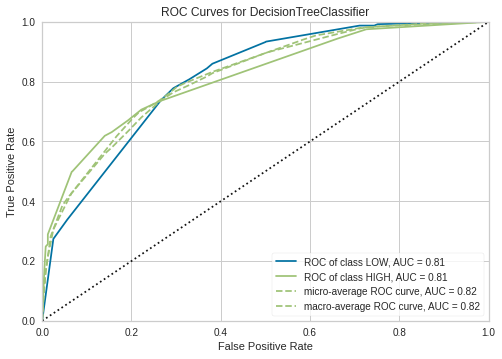

In [118]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(DT, classes=('LOW', 'HIGH'))
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()    